<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW#1 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions (15%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма ЭСС при изменении параметра $\alpha$ от 0 до 1.

$\textbf{Ответы на теоретическую часть в отдельном pdf}$

**Вопрос 2**: Каким следует выбрать параметр сглаживания тренда $\alpha_2$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

<Ответ>

**Вопрос 3**: Докажите  эквивалетность формул расчёта (в рекуррентной форме и в форме корректировки прогноза (correction error form) )скрытых компонент временного ряда в модели Тейла-Вейджа (период сезонность обозначается $p$):
$$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} ) \color{red}{=} l_{t-1} + b_{t-1} + \alpha e_t;$$,
    $$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} \color{red}{=} b_{t-1} + \alpha\beta e_t;$$,
    $$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} \color{red}{=} s_{t-p} + \gamma(1-\alpha)e_t.$$,

<Ответ>

**Вопрос 4**: Выведите формулу расчёта скрытых компонент в форме корректировки прогноза (correction error form) временного ряда в модели ЭС с линейным затухающим трендом (WS with additive damped trend):

$$\hat{y}_{t+d|t} = l_t + \left(\phi + \phi^2 + \dots + \phi^{d}\right) b_t.$$,
   
Скрытые компоненты ВР согласно модели в рекуррентной форме записываются:
    $$ l_{t}       = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),$$,
    $$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.$$


<Ответ>

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center"> Practice</h1>
#  1. reading data (5%)

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)

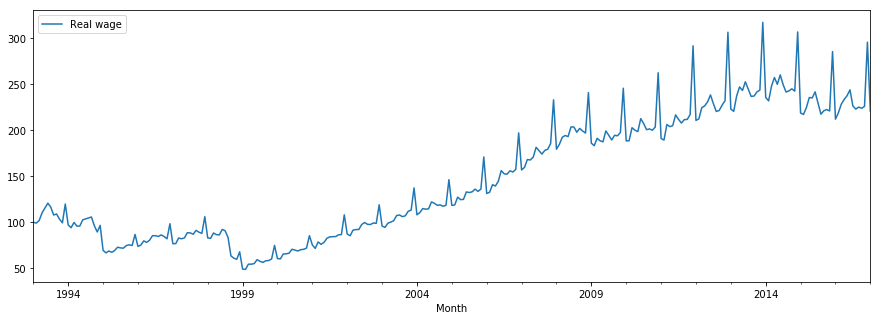

In [1]:
# start with this code
import pandas as pd
import numpy as np
import math
from utils import InitExponentialSmoothing, BuildForecast, plotTSForecast
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 

%matplotlib inline


wage = pd.read_csv('monthly-wage.csv', sep=';', decimal='.', index_col=0, parse_dates=True, dayfirst=True)

# Put your code below
wage.plot(figsize=(15,5))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


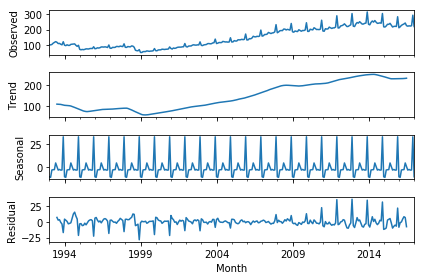

In [2]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(wage['Real wage'])
resplot = res.plot()

# 2. Build the Forecast with  IES (5%)

You need to apply IES model (see seminar 1) for the TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.


* 0) Forecast Wage TS with SES $\alpha=.1$.
* 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You 
can choose any loss function above).
* 2) Draw the forecast that correspond to IES with optimial value $\alpha$ (use time steps from 09.1998 to 01.2017.)
     Conclude whether IES can be used for this TS? If can not than explain why.
* 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]. (You can choose any Loss function from seminar 1).

In [3]:
wage.head(5)

,Real wage
Month,
1993-01-01,100.00
1993-02-01,99.04
1993-03-01,101.77
1993-04-01,110.05
1993-05-01,115.47


## 1) Search for the optimal $\alpha$ 

In [4]:
ALPHA = np.linspace(0.01, 0.99, 10)
AD_PERIOD = np.linspace(2, 20, 10)
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':period} for alpha in ALPHA for period in AD_PERIOD]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName = 'InitExponentialSmoothing', AlgTitle='IES',ParamsArray = ESParamsArray)

In [5]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

IES {'alpha': 0.44555555555555554, 'AdaptationPeriod': 18.0}    0.059051
IES {'alpha': 0.44555555555555554, 'AdaptationPeriod': 16.0}    0.059051
IES {'alpha': 0.44555555555555554, 'AdaptationPeriod': 14.0}    0.059051
IES {'alpha': 0.44555555555555554, 'AdaptationPeriod': 4.0}     0.059051
IES {'alpha': 0.44555555555555554, 'AdaptationPeriod': 12.0}    0.059051
IES {'alpha': 0.44555555555555554, 'AdaptationPeriod': 10.0}    0.059051
IES {'alpha': 0.44555555555555554, 'AdaptationPeriod': 8.0}     0.059051
IES {'alpha': 0.44555555555555554, 'AdaptationPeriod': 6.0}     0.059051
IES {'alpha': 0.44555555555555554, 'AdaptationPeriod': 2.0}     0.059051
IES {'alpha': 0.44555555555555554, 'AdaptationPeriod': 20.0}    0.059051
IES {'alpha': 0.33666666666666667, 'AdaptationPeriod': 18.0}    0.059509
IES {'alpha': 0.33666666666666667, 'AdaptationPeriod': 16.0}    0.059509
IES {'alpha': 0.33666666666666667, 'AdaptationPeriod': 14.0}    0.059509
IES {'alpha': 0.33666666666666667, 'AdaptationPerio

## 2) draw the forecast with optimial value $\alpha $

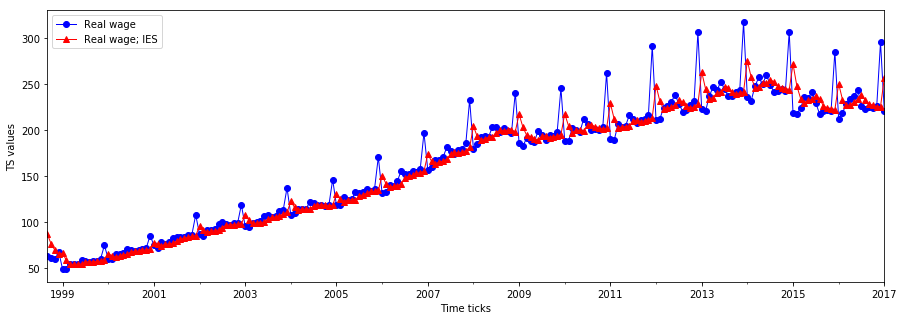

In [6]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE[algName].loc['1998-09-01':'2017-01-01']
               , ts_num=0, alg_title='IES')

** Question**
    * Does SES follow to the TS components?

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [7]:
qualityMACAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE[algName].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.063443
dtype: float64

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of IES: is it better? 
* 5) Conclude whether Winter's ES can be used for this TS?

In [8]:
def BuildForecast(h, ts, AlgName, AlgTitle, ParamsArray, step='D'):
	FRC_TS = dict()
	for p in ParamsArray:
		frc_horizon = pd.date_range(ts.index[-1], periods=h+1, freq=step)[1:]
		frc_ts = pd.DataFrame(index = ts.index.append(frc_horizon), columns = ts.columns)
		
		for cntr in ts.columns:
			frc_ts[cntr] = eval(AlgName)(ts[cntr], h, p)
		
#         frc_ts.columns = frc_ts.columns+('%s %s' % (AlgTitle, p))
		FRC_TS['%s %s' % (AlgTitle, p)] = frc_ts
	return FRC_TS

In [9]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    gamma <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha'] 
    gamma = Params['gamma'] 
    p = Params['seasonality_period'] 
    
    FORECAST = [0.0] * (T + h)
    
    l = [np.NaN] * (T + h)
    s = [np.NaN] * (T + h)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l[cntr]):
                l[cntr] = x[0] 
 
            if math.isnan(s[cntr]):
                s[cntr]= 1
            
 
            l[cntr] = alpha * (x[cntr] - s[cntr - p]) + (1 - alpha) * l[cntr - 1] if cntr >= p else x[0]
            s[cntr] = gamma * (x[cntr] - l[cntr - 1]) + (1 - gamma) * s[cntr - p] if cntr >= p else 1
            
        FORECAST[cntr+h] = l[cntr] + s[cntr - p + h % p]
    #print(FORECAST)
    return FORECAST

In [10]:
# Put your code here
ALPHA = np.linspace(0.01, 0.99, 10)
GAMMA = np.linspace(0.01, 0.99, 10)
AD_PERIOD = np.linspace(2, 20, 10)

ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':ad_period, 'gamma':gamma, 'seasonality_period':12} for alpha in ALPHA for gamma in GAMMA for ad_period in AD_PERIOD]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName = 'WintersExponentialSmoothing', AlgTitle='WES',ParamsArray = ESParamsArray)

In [11]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

WES {'alpha': 0.66333333333333333, 'AdaptationPeriod': 14.0, 'gamma': 0.44555555555555554, 'seasonality_period': 12}    0.023333
WES {'alpha': 0.66333333333333333, 'AdaptationPeriod': 4.0, 'gamma': 0.44555555555555554, 'seasonality_period': 12}     0.023333
WES {'alpha': 0.66333333333333333, 'AdaptationPeriod': 6.0, 'gamma': 0.44555555555555554, 'seasonality_period': 12}     0.023333
WES {'alpha': 0.66333333333333333, 'AdaptationPeriod': 8.0, 'gamma': 0.44555555555555554, 'seasonality_period': 12}     0.023333
WES {'alpha': 0.66333333333333333, 'AdaptationPeriod': 10.0, 'gamma': 0.44555555555555554, 'seasonality_period': 12}    0.023333
WES {'alpha': 0.66333333333333333, 'AdaptationPeriod': 12.0, 'gamma': 0.44555555555555554, 'seasonality_period': 12}    0.023333
WES {'alpha': 0.66333333333333333, 'AdaptationPeriod': 16.0, 'gamma': 0.44555555555555554, 'seasonality_period': 12}    0.023333
WES {'alpha': 0.66333333333333333, 'AdaptationPeriod': 18.0, 'gamma': 0.44555555555555554, 'seaso

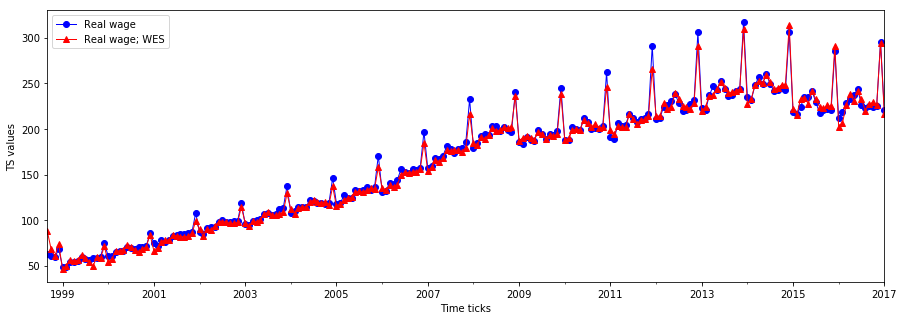

In [12]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE[algName].loc['1998-09-01':'2017-01-01']
               , ts_num=0, alg_title='WES')

In [13]:
qualityMACAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE[algName].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.01925
dtype: float64

Видно, что ошибка предсказания стала меньше по сравнению с IES-моделью.

# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [14]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    gamma <scalar in [0,1]> - seasonality smoothing parameter

def TheilWageSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha'] 
    beta = Params['beta'] 
    gamma = Params['gamma'] 
    p = Params['seasonality_period'] 
    
    FORECAST = [0.0] * (T + h)
    
    l = [np.NaN] * (T + h)
    b = [np.NaN] * (T + h)
    s = [1.0] * p
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l[cntr]):
                l[cntr] = x[cntr]
            if math.isnan(b[cntr]):
                b[cntr] = x[cntr] - x[cntr - 1] if cntr >= 1 else 0
 
            l[cntr] = alpha * (x[cntr] - s[cntr % p]) + (1 - alpha) * (l[cntr - 1] + b[cntr - 1]) if cntr >= 1 else x[cntr]
            b[cntr] = beta * (l[cntr] - l[cntr - 1]) + (1 - beta) * b[cntr - 1] if cntr >= 1 else 0
            s[cntr % p] = gamma * (x[cntr] - l[cntr]) + (1 - gamma) * s[cntr % p] if cntr >= 1 else 1
            
        FORECAST[cntr + h] = l[cntr] + b[cntr] + s[(cntr + h) % p]
    #print(FORECAST)
    return FORECAST

In [15]:
# Put your code here
ALPHA = np.linspace(0.01, 0.99, 10)
BETA = np.linspace(0.01, 0.99, 10)
GAMMA = np.linspace(0.01, 0.99, 10)

ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':10, 'gamma':gamma, 'beta': beta, 'seasonality_period': 12} for alpha in ALPHA \
                 for gamma in GAMMA for beta in BETA]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName = 'TheilWageSmoothing', AlgTitle='TWS',ParamsArray = ESParamsArray)

In [16]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

TWS {'alpha': 0.22777777777777777, 'AdaptationPeriod': 10, 'gamma': 0.66333333333333333, 'beta': 0.88111111111111107, 'seasonality_period': 12}   -27.760894
TWS {'alpha': 0.22777777777777777, 'AdaptationPeriod': 10, 'gamma': 0.55444444444444441, 'beta': 0.88111111111111107, 'seasonality_period': 12}   -13.954877
TWS {'alpha': 0.22777777777777777, 'AdaptationPeriod': 10, 'gamma': 0.88111111111111107, 'beta': 0.88111111111111107, 'seasonality_period': 12}    -9.118719
TWS {'alpha': 0.22777777777777777, 'AdaptationPeriod': 10, 'gamma': 0.66333333333333333, 'beta': 0.98999999999999999, 'seasonality_period': 12}    -4.868387
TWS {'alpha': 0.33666666666666667, 'AdaptationPeriod': 10, 'gamma': 0.88111111111111107, 'beta': 0.55444444444444441, 'seasonality_period': 12}    -3.675227
TWS {'alpha': 0.11888888888888888, 'AdaptationPeriod': 10, 'gamma': 0.98999999999999999, 'beta': 0.88111111111111107, 'seasonality_period': 12}    -2.587192
TWS {'alpha': 0.33666666666666667, 'AdaptationPeriod': 10,

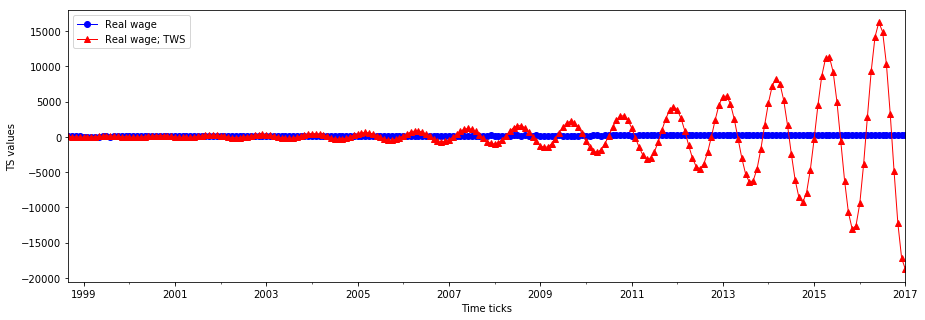

In [17]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE[algName].loc['1998-09-01':'2017-01-01']
               , ts_num=0, alg_title='TWS')

In [18]:
qualityMACAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE[algName].loc['2015-02-01':'2017-01-01'])[0]

Real wage   -0.053429
dtype: float64

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it by expert opinion (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diveret

In [19]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    gamma <scalar in [0,1]> - seasonality smoothing parameter

def MultySmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta'] 
    gamma = Params['gamma'] 
    p = Params['seasonality_period']
    
    FORECAST = [0.0] * (T + h)
    
    l = [np.NaN] * (T + h)
    b = [np.NaN] * (T + h)
    s = [0.0] * p
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l[cntr]):
                l[cntr] = x[cntr] 
            if math.isnan(b[cntr]):
                b[cntr] = x[cntr] - x[cntr - 1] if cntr >= 1 else 0
            
  
            l[cntr] = alpha * x[cntr] + (1 - alpha) * (l[cntr - 1] * b[cntr - 1]) if cntr >= 1 else x[cntr]
            b[cntr] = beta * l[cntr] / l[cntr - 1] + (1 - beta) * b[cntr - 1] if cntr >= 1 else 0
            s[cntr % p] = gamma * (x[cntr] / l[cntr]) + (1 - gamma) * s[cntr % p]
            
        FORECAST[cntr+h] = (l[cntr] * b[cntr]) * s[(cntr + h) % p]
    #print(FORECAST)
    return FORECAST

In [20]:
# Put your code here
ALPHA = np.linspace(0.01, 0.99, 10)
BETA = np.linspace(0.01, 0.99, 10)
GAMMA = np.linspace(0.01, 0.99, 10)
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':10, 'gamma':gamma, 'beta': beta, 'seasonality_period':12} for alpha in ALPHA for gamma in GAMMA for beta in BETA]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName = 'MultySmoothing', AlgTitle='MS',ParamsArray = ESParamsArray)

In [21]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

MS {'alpha': 0.22777777777777777, 'AdaptationPeriod': 10, 'gamma': 0.77222222222222214, 'beta': 0.98999999999999999, 'seasonality_period': 12}    0.035460
MS {'alpha': 0.22777777777777777, 'AdaptationPeriod': 10, 'gamma': 0.66333333333333333, 'beta': 0.98999999999999999, 'seasonality_period': 12}    0.035526
MS {'alpha': 0.22777777777777777, 'AdaptationPeriod': 10, 'gamma': 0.88111111111111107, 'beta': 0.98999999999999999, 'seasonality_period': 12}    0.035548
MS {'alpha': 0.22777777777777777, 'AdaptationPeriod': 10, 'gamma': 0.66333333333333333, 'beta': 0.88111111111111107, 'seasonality_period': 12}    0.035604
MS {'alpha': 0.22777777777777777, 'AdaptationPeriod': 10, 'gamma': 0.77222222222222214, 'beta': 0.88111111111111107, 'seasonality_period': 12}    0.035703
MS {'alpha': 0.22777777777777777, 'AdaptationPeriod': 10, 'gamma': 0.98999999999999999, 'beta': 0.98999999999999999, 'seasonality_period': 12}    0.035789
MS {'alpha': 0.22777777777777777, 'AdaptationPeriod': 10, 'gamma': 0.8

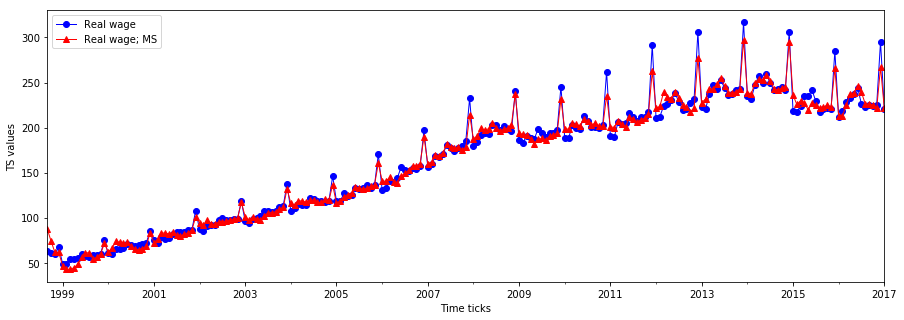

In [22]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE[algName].loc['1998-09-01':'2017-01-01']
               , ts_num=0, alg_title='MS')

In [23]:
qualityMACAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE[algName].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.027272
dtype: float64